## Drone Airspace Coding Challenge
* Given a square airspace, 128km x 128km, and N=10,000 drones occupying the airspace our challenge is to efficiently compute how many drones are flying too close to one  another. 
* Drone positions will be provided as an Nx2 array of [x,y] coordinates (in meters).
* Drones must maintain a horizontal separation of radius 0.5km from other drones. 
* If a drone is within 0.5km of another drone, both are "in conflict".
* Have count_conflicts return the total number of drones that are in a conflicted state. Not the total number of conflicts.
* Some common libraries can be imported, but not all, so relying on niche algorithms won't work. 
* This is very solvable with standard python libraries, several ways. 
* Coding style, readability, scalability, and documentation all matter! Consider the computational complexity of your solution. 
The N^2 answer can be coded up in 5 minutes and # 10 lines; we'd like to see something better!

## Run All First

In [9]:
import matplotlib as plt
import numpy as np
import math
import time
%matplotlib inline
import random
random.seed(1)  # Setting random number generator seed for repeatability

In [10]:
NUM_DRONES = 10000
AIRSPACE_SIZE = 128000 # 128 km
CONFLICT_RADIUS = 500  # Meters.

In [11]:
def gen_coord():
    return int(random.random() * AIRSPACE_SIZE)

In [12]:
positions = [[gen_coord(), gen_coord()] for i in range(NUM_DRONES)]
new_positions = np.asarray(positions)  # convert to a numpy array for easy plotting I think

## All Functions and different Aproaches

## First Polished attempt

In [13]:
def count_conflicts_1(drones, conflict_radius):

    start = time.time()
    
    conflicts = []
    
    # should do this in a single nested loop ???
    for first in range(len(drones)):
            for second in range(len(drones)):

                if first != second: #so 1vs1,2vs2 etc doesnt compute, 1 vs 3 and 3 vs 1 still computes???? make a unique set?
                    
                    #how to create a unique set of pair values so dont waste time running samee 3,1 and 1,3????
                    #banged my head with this one
                    #
    
                    if (abs(drones[first,0]-drones[second,0]) <= conflict_radius) and (abs(drones[first,1]-drones[second,1]) <= conflict_radius): 
                    #if x2-x1 and y2-y1 greater than 500 can skip these points
                    #think the checking and reduction of points is quicker than computing all Euclid distances
                        distance = math.hypot(drones[first,0]-drones[second,0],drones[first,1]-drones[second,1])
                        if distance <= conflict_radius: #now checking the actual Euclidean distance is less than the conflict_radius
                            conflicts.append(first)#all instances of conflicts
                            break #if there is a conflict break out for 2nd loop
       
    end = time.time()
    
    return  len(set(conflicts)), end-start


## 2nd Polished using a set, break and removing from list

In [14]:
def count_conflicts_4(drones, conflict_radius):
    
    start = time.time()
    
    conflicts = set()
    d_rones = list(range(NUM_DRONES))
    
    for first in d_rones:#cycling through all drones, first drone compared to all other drones for conflicts
            for second in range(len(drones)):

                if first != second: #so 1vs1,2vs2 etc doesnt compute, TRYING TO REDUCE REDUNDANCY
    
                    if (abs(drones[first,0]-drones[second,0]) <= conflict_radius) and (abs(drones[first,1]-drones[second,1]) <= conflict_radius): 
                    #if x2-x1 and y2-y1 greater than 500 can skip these points
                    #think the reduction of points is quicker than computing all Euclid distances
                        
                        distance = math.hypot(drones[first,0]-drones[second,0],drones[first,1]-drones[second,1])
                    
                        if distance <= conflict_radius: #now checking the actual Euclidean distance
                            conflicts.add(first)
                            conflicts.add(second)#set function so wont add duplicates
                            if second in d_rones:
                                d_rones.remove(second)#removes the second drone from comparisOn list 
                                                      #think this removes the issue of 1 vs 3 and 3 vs 1
                                
                            break
                                
                                ##NOT SURE IF THIS THE CORRECT THINKING ABOUT TRYING TO REDUCE COMPUTE TIME
                                ##AND IF ITS ACTUALLY ADDING OR REDUCING
   
    end = time.time()

    return  len(conflicts), end-start

In [7]:
count_conflicts_1(new_positions, CONFLICT_RADIUS)

(3789, 40.68326020240784)

In [16]:
count_conflicts_1(new_positions, CONFLICT_RADIUS)

(3789, 39.71333336830139)

In [8]:
count_conflicts_4(new_positions, CONFLICT_RADIUS)

(3757, 36.86563515663147)

In [15]:
count_conflicts_4(new_positions, CONFLICT_RADIUS)

(3757, 36.66344857215881)

In [ ]:
count_conflicts_4(new_positions, CONFLICT_RADIUS)

## Expected Output

In [ ]:
conflicts = count_conflicts(new_positions, CONFLICT_RADIUS)
print("Drones in conflict: {}".format(conflicts))

## Wanted to visualise problem with smaller datasets

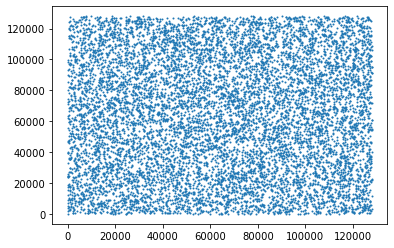

In [17]:
plt.pyplot.scatter(new_positions[:,0],new_positions[:,1],s=1)

## First attempt

In [ ]:
def distances(posts):#calculate distance of every drone to every other drone
    
    conflicts = []
    
    for first in range(len(positions)):
            for second in range(len(positions)):

                if first != second: #so 1vs1,2vs2 etc doesnt compute, 1 vs 3 and 3 vs 1 still computes
                    
                    distance = math.hypot(posts[first,0]-posts[second,0],posts[first,1]-posts[second,1])
                    #print(distance)
                    if distance <= 500:
                        conflicts.append([first,second,distance])
                        
    return conflicts

## 2ndish attempt

In [ ]:
def count_conflicts_2(drones, conflict_radius):
    import functools
    import operator
    conflicts = []
    conflicts_2 = [] #concatenated list to check for unique drone instances
    data = []
    
    for first in range(len(drones)):
            for second in range(len(drones)):

                if first != second: #so 1vs1,2vs2 etc doesnt compute, 1 vs 3 and 3 vs 1 still computes???? make a unique set?
                    
                    #how to create a unique set of pair values so dont waste time ????
    
                    if (abs(drones[first,0]-drones[second,0]) <= conflict_radius) and (abs(drones[first,1]-drones[second,1]) <= conflict_radius): 
                    #if x and y greater than 500 can skip these points#think the reduction of points is quicker than computing all Euclid distances
                        distance = math.hypot(drones[first,0]-drones[second,0],drones[first,1]-drones[second,1])
                        if distance <= conflict_radius: #now checking the actual Euclidean distance
                            conflicts.append([first,second])#little redu
                            conflicts_2.append(first)
                            data.append([first, second, distance])
                            #checking if I didnt need to add both since the nested for lopp covers both possibilities
    
    print(len(set(conflicts_2)))
    return  len(set(functools.reduce(operator.iconcat, conflicts, []))), data


In [ ]:
#count_conflicts_2(new_positions, CONFLICT_RADIUS)

## Trying to create the unique array [1,1][1,2][1,3][2,2][2,3][3,3]

had an idiea to check the i,k divisbile and multiple but didnt try it yet

In [ ]:
test = []
for i in range(1,11):
    for k in range(1,11):
        if i!=k:
            for j in range(len(test)):
                print(i,k,j)
                alt = []
                alt = [test[j][1],test[j][0]]
                print(alt)
                if test[j] != alt:
                    test.append([i,k])
            

## Trying to improve the computing time by removing the 2nd drone fro mthe main list

In [ ]:
def count_conflicts_3(drones, conflict_radius):
    
    start = time.time()
    
    conflicts = []
    d_rones = list(range(NUM_DRONES))
    
    
    for first in d_rones:#cycling through all drones, first drone compared to all other drones for conflicts
            for second in range(len(drones)):

                if first != second: #so 1vs1,2vs2 etc doesnt compute, TRYING TO REDUCE REDUNDANCY
    
                    if (abs(drones[first,0]-drones[second,0]) <= conflict_radius) and (abs(drones[first,1]-drones[second,1]) <= conflict_radius): 
                    #if x and y greater than 500 can skip these points
                    #think the reduction of points is quicker than computing all Euclid distances
                        
                        distance = math.hypot(drones[first,0]-drones[second,0],drones[first,1]-drones[second,1])
                    
                        if distance <= conflict_radius: #now checking the actual Euclidean distance
                            conflicts.append(first)
                            conflicts.append(second)
                            if second in d_rones:
                                d_rones.remove(second)#removes the second drone from comparisOn list 
                                break
                                ##NOT SURE IF THIS THE CORRECT THINKING ABOUT TRYING TO REDUCE COMPUTE TIME
                                ##AND IF ITS ACTUALLY ADDING OR REDUCING
                            
    end = time.time()
        
    return  len(conflicts), end-start

## Timing

In [ ]:
import time

# starting time
start = time.time()

# program body starts
for i in range(10):
    print(i)

# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")